<a href="https://colab.research.google.com/github/nitaymayo/My_Portfolio/blob/main/AI/Tensorflow/01_Classification_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Classification Neural Networks

In [ ]:
# Creating the data set, 2 circels one inside the other
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [ ]:
# Checking the samples(coordinates)
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Checking the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
import pandas as pd

circels = pd.DataFrame({"x0":x[:, 0], "x1":x[:, 1], "label": y})

circels

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


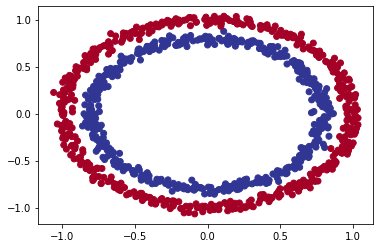

In [ ]:
# Visualizing
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# Splitting the data to test and train sets
from sklearn.model_selection import train_test_split

x = np.array(x)
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape

((800, 2), (200, 2))

In [ ]:
# Build, Compile and Train the model
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.InputLayer((2)),
    tf.keras.layers.Dense(1, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=["acc"])

callbacks = [
    tf.keras.callbacks.EarlyStopping("loss", min_delta=0.05, patience=25, verbose=1)
]

model_1.fit(x_train, y_train, epochs=500, validation_split=0.2, callbacks=callbacks, verbose=0)

model_1.evaluate(x_test, y_test)

Epoch 29: early stopping
7/7 [==============================] - 0s 3ms/step - loss: 0.6962 - acc: 0.4800


[0.696228563785553, 0.47999998927116394]

In [ ]:
# Trying more complicated layers
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.InputLayer((2)),
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=["acc"])

callbacks = [
    tf.keras.callbacks.EarlyStopping("loss", min_delta=0.05, patience=25, verbose=1)
]

model_2.fit(x_train, y_train, epochs=500, validation_split=0.2, callbacks=callbacks, verbose=0)

model_2.evaluate(x_test, y_test)

Epoch 43: early stopping
7/7 [==============================] - 0s 4ms/step - loss: 0.0188 - acc: 0.9950


[0.018756413832306862, 0.9950000047683716]

In [ ]:
import numpy as np

In [ ]:
# Function to plot the decision boundary of the model
def plot_decision_boundary(model, x, y):
  x_min, x_max = x[:, 0].min() - 1, x[:, 1].max() + 1
  y_min, y_max = x[:, 0].min() - 1, x[:, 1].max() + 1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(x[:, 0], x[:, 1], c=y, s=20, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min()+1, xx.max()-1)
  plt.ylim(yy.min()+1, yy.max()-1)

313/313 [==============================] - 0s 1ms/step


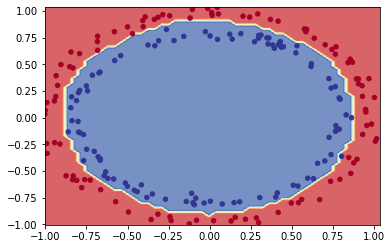

In [ ]:
# Plotting model 2 decision boundary
plot_decision_boundary(model_2, x_test, y_test)

In [ ]:
# Plotting confusion matrix
from sklearn.metrics import confusion_matrix

y_preds = model_2.predict(x_test)

y_preds = tf.round(y_preds)

confusion_matrix(y_test, y_preds)
                    

7/7 [==============================] - 0s 2ms/step


array([[100,   0],
       [  1,  99]])

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# Download the fashion mnist dataset
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data = train_data / 255.0
test_data = test_data / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data[:10], test_data[:10]

In [ ]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
train_data.min(), train_data.max()

(0.0, 1.0)

In [ ]:
classes = ["T-shirt",
"Trouser",
"Pullover",
"Dress",
"coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"
]

In [ ]:
import matplotlib.pyplot as plt

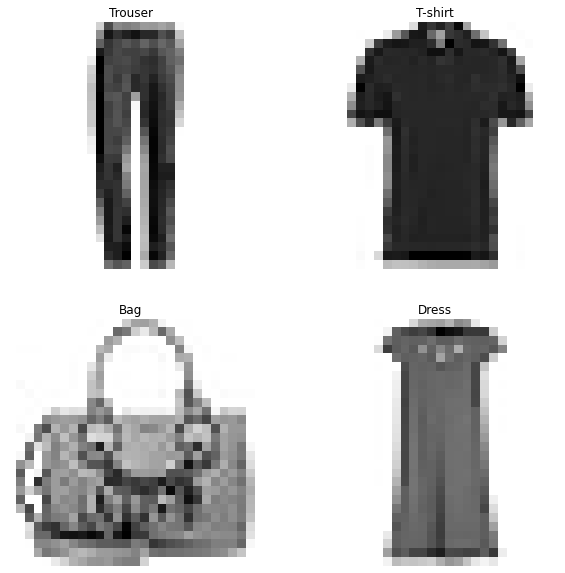

In [ ]:
# Visualizing the data
import random

plt.figure(figsize=(10, 10))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(classes[train_labels[rand_index]])
  plt.axis(False)


In [ ]:
# Build, Compile and train the model
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")     
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["acc"])

no_lr_opt_hist = model_3.fit(train_data, 
                             train_labels, 
                             epochs=20, 
                             validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - acc: 0.6474 - val_loss: 0.6937 - val_acc: 0.7617
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - acc: 0.7757 - val_loss: 0.6400 - val_acc: 0.7820
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - acc: 0.7914 - val_loss: 0.6247 - val_acc: 0.7783
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - acc: 0.7979 - val_loss: 0.6078 - val_acc: 0.7881
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5641 - acc: 0.8006 - val_loss: 0.6169 - val_acc: 0.7881
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - acc: 0.8043 - val_loss: 0.5855 - val_acc: 0.7951
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - acc: 0.8063 - val_loss: 0.6097 - val_acc: 0.7836
Epoch 8/20
1875/1875 [==============================] - 5s 3ms

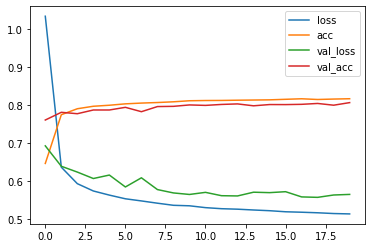

In [ ]:
# Plotting the loss curves
import pandas as pd

pd.DataFrame(no_lr_opt_hist.history).plot()

In [ ]:
# Build, Compile and train the model using LearningRateScheduler callback to change the lr while training
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")     
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["acc"])

callbacks = [tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6*tf.math.pow(10.0, (epoch/3)))]

lr_opt_hist = model_3.fit(train_data, 
                             train_labels, 
                             epochs=20, 
                             validation_data=(test_data, test_labels),
                             callbacks=callbacks)

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3481 - acc: 0.0940 - val_loss: 2.3276 - val_acc: 0.0921 - lr: 1.0000e-06
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3080 - acc: 0.0977 - val_loss: 2.2951 - val_acc: 0.1113 - lr: 2.1544e-06
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2646 - acc: 0.1131 - val_loss: 2.2325 - val_acc: 0.1192 - lr: 4.6416e-06
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1819 - acc: 0.1481 - val_loss: 2.1421 - val_acc: 0.1684 - lr: 1.0000e-05
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 2.0552 - acc: 0.2324 - val_loss: 1.9805 - val_acc: 0.3250 - lr: 2.1544e-05
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8282 - acc: 0.3862 - val_loss: 1.7073 - val_acc: 0.4415 - lr: 4.6416e-05
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4762 - acc: 0.46

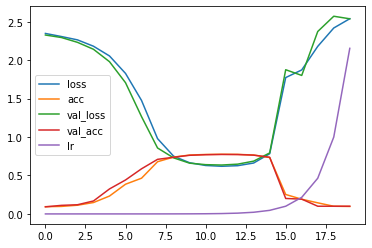

In [ ]:
import pandas as pd

pd.DataFrame(lr_opt_hist.history).plot()

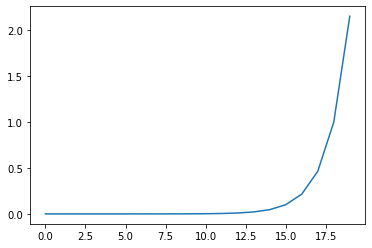

In [ ]:
# Getting the lr values that used when trained the model
import matplotlib.pyplot as plt

x = lambda epoch: 1e-6*tf.math.pow(10.0, (epoch/3))
lr_range = [x(i) for i in range(20)]
plt.plot(lr_range)

Text(0.5, 1.0, 'LR VS Loss')

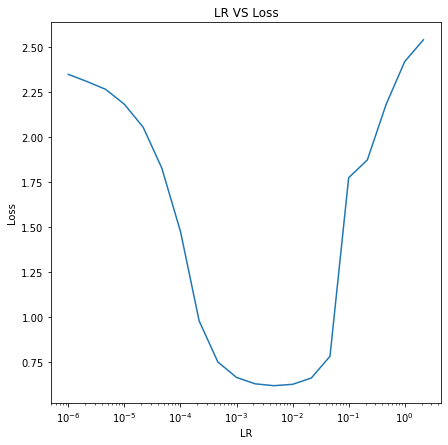

In [ ]:
# Plotting lr againts loss to find the ideal learning rate
plt.figure(figsize=(7, 7))
plt.semilogx(lr_range, lr_opt_hist.history["loss"])
plt.xlabel("LR")
plt.ylabel("Loss")
plt.title("LR VS Loss")

In [ ]:
# Training a model with the ideal learning rate
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")     
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=1e-3),
                metrics=["acc"])

optimized_lr_hist = model_3.fit(train_data, 
                             train_labels, 
                             epochs=20, 
                             validation_data=(test_data, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0348 - acc: 0.6474 - val_loss: 0.6937 - val_acc: 0.7617
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6376 - acc: 0.7757 - val_loss: 0.6400 - val_acc: 0.7820
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - acc: 0.7914 - val_loss: 0.6247 - val_acc: 0.7783
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5750 - acc: 0.7979 - val_loss: 0.6078 - val_acc: 0.7881
Epoch 5/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5641 - acc: 0.8006 - val_loss: 0.6169 - val_acc: 0.7881
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5544 - acc: 0.8043 - val_loss: 0.5855 - val_acc: 0.7951
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5488 - acc: 0.8063 - val_loss: 0.6097 - val_acc: 0.7836
Epoch 8/20
1875/1875 [==============================] - 5s 3ms

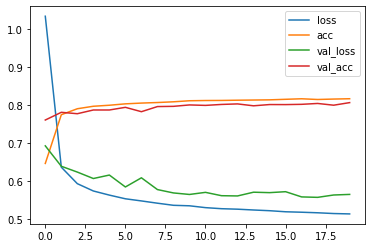

In [ ]:
pd.DataFrame(optimized_lr_hist.history).plot()

In [ ]:
# Function to print a pretty confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels, 
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
# Getting model 3 predictions
y_probs = model_3.predict(test_data)

y_probs[:5]

313/313 [==============================] - 1s 1ms/step


array([[8.5630038e-11, 3.5361923e-13, 2.6633796e-05, 4.6356057e-08,
        5.0949642e-05, 9.6118979e-02, 8.1778097e-08, 9.1868639e-02,
        4.0605105e-03, 8.0787414e-01],
       [3.4278555e-06, 1.2899412e-16, 9.5989150e-01, 2.0516218e-07,
        1.5329195e-02, 2.4532527e-13, 2.4142891e-02, 1.1383710e-28,
        6.3271867e-04, 4.4789640e-08],
       [6.1063060e-05, 9.9657673e-01, 4.3867310e-08, 3.3405882e-03,
        1.3249612e-05, 1.4383545e-21, 8.2791003e-06, 7.3238853e-18,
        5.4811920e-08, 4.9225709e-14],
       [7.5031370e-05, 9.9053699e-01, 4.2528902e-07, 9.2231650e-03,
        1.3623273e-04, 1.8276510e-18, 2.6808373e-05, 4.8125292e-14,
        1.4521634e-06, 2.2211717e-11],
       [7.2189897e-02, 1.5495709e-06, 2.5566906e-01, 1.0363110e-02,
        4.3541320e-02, 1.1069409e-13, 6.1693019e-01, 6.7544158e-23,
        1.3049176e-03, 1.2140382e-09]], dtype=float32)

In [ ]:
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
class_names = classes

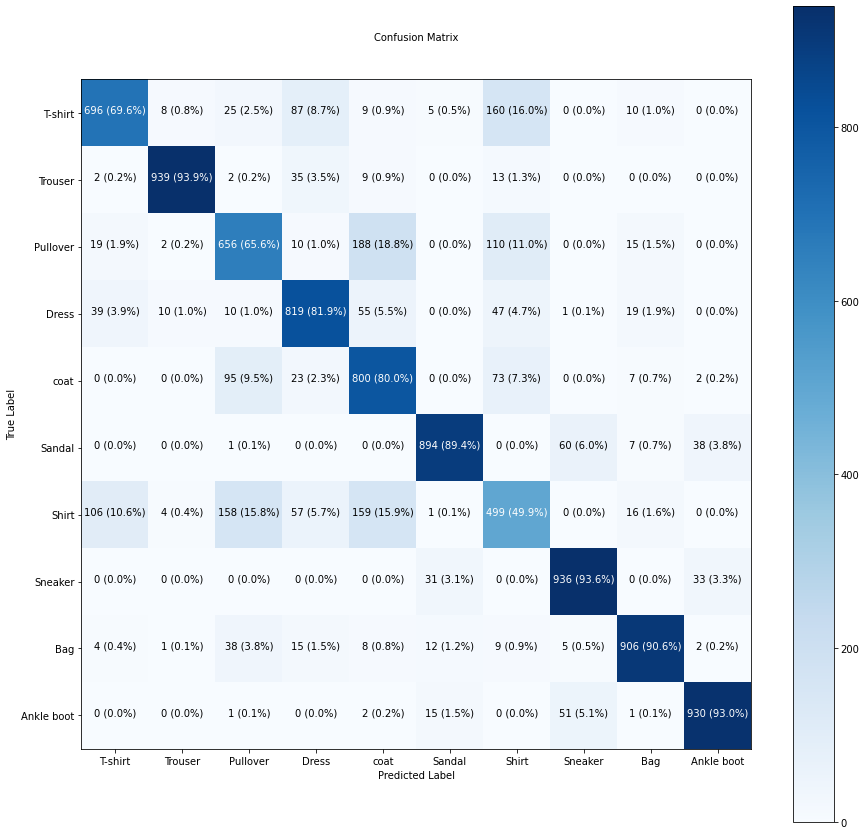

In [ ]:
# Plotting confusion matrix
from sklearn.metrics import confusion_matrix

make_confusion_matrix(test_labels, y_preds, class_names, figsize=(15,15), text_size=10)

In [ ]:
def plot_random_image(model, images, true_labels, classes):
  """
  Makes prediction on a random image from a dataset using a given model

  Args:
  model: model to predict with
  images: set of images to predict on
  true_labels: true labels of the given set
  classes: class names of the set

  Returns:
  A plot of the image with true label and predicted label as the title
  """
  rand = random.randint(0, len(images))
  rand_image = images[rand]
  rand_label = true_labels[rand]
  y_pred = tf.argmax(model.predict(rand_image, verbose=0), axis=1).numpy()[0]
  plt.imshow(rand_image)
  plt.xlabel(f"true: {classes[rand_label]}, pred: {classes[y_pred]}")



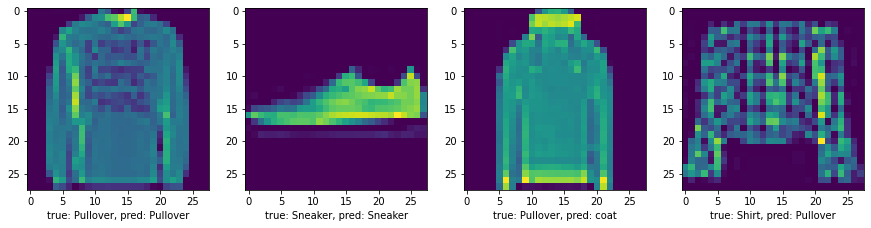

In [ ]:
plt.figure(figsize=(15,15))
for i in range(4):
  plt.subplot(1, 4, i+1)
  plot_random_image(model_3, test_data, test_labels, class_names)

In [ ]:
# Getting a dense layer from the model to plot its weights
dense1 = model_3.layers[1]
dense1

In [ ]:
dense1.get_weights()

[array([[ 0.715027  , -0.06077112, -0.9976308 , -1.0484312 ],
        [ 0.27732143, -0.4715541 , -0.5291646 ,  0.02329262],
        [ 0.7752432 ,  0.5402756 , -1.128857  , -0.7426152 ],
        ...,
        [-0.39453375,  0.47628623, -0.22641547,  0.25505966],
        [-0.40515727,  0.6181007 ,  0.23928417, -0.503876  ],
        [ 0.23884544,  0.11606897, -0.1213136 ,  0.04352434]],
       dtype=float32),
 array([ 2.4485679e-02, -6.1455613e-04, -2.7230152e-01,  8.1124908e-01],
       dtype=float32)]

In [ ]:
# Getting the weights
weights, bias = dense1.get_weights()
weights[0, :].shape

(4,)

In [ ]:
def print_weights(layer):
  """
  Plots a layer weights
  """
  weights, bias = layer.get_weights()
  plot_size = np.ceil(np.sqrt(len(weights[0, :])))
  img_size = np.sqrt(len(weights[:, 0]))
  for i in range(len(weights[0, :])):
    plt.subplot(plot_size, plot_size, i+1)
    plt.imshow(weights[:, i].reshape((int(img_size), int(img_size))))
  

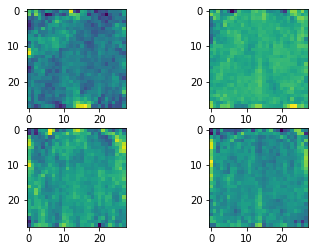

In [ ]:
print_weights(model_3.layers[1])

In [ ]:
# Creating a model with more complicated layers to plot the weights
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")     
])

model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=1e-4),
                metrics=["acc"])

history = model_4.fit(train_data, 
                             train_labels, 
                             epochs=20, 
                             validation_data=(test_data, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3354 - acc: 0.5475 - val_loss: 0.8322 - val_acc: 0.7404
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7087 - acc: 0.7766 - val_loss: 0.6628 - val_acc: 0.7858
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6020 - acc: 0.8049 - val_loss: 0.5962 - val_acc: 0.8042
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5528 - acc: 0.8208 - val_loss: 0.5598 - val_acc: 0.8128
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5220 - acc: 0.8297 - val_loss: 0.5362 - val_acc: 0.8177
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5001 - acc: 0.8358 - val_loss: 0.5199 - val_acc: 0.8250
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4839 - acc: 0.8398 - val_loss: 0.5061 - val_acc: 0.8300
Epoch 8/20
1875/1875 [==============================] - 5s 2ms

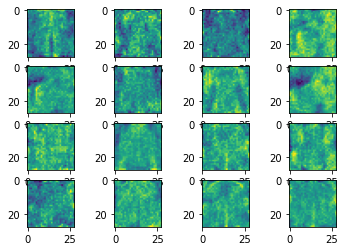

In [ ]:
# Plotting the first layer weights
print_weights(model_4.layers[1])

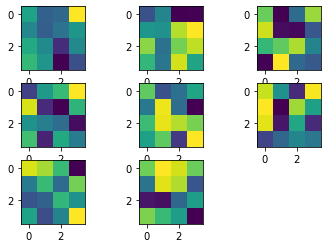

In [ ]:
# Plot the last hidden layer weights
print_weights(model_4.layers[2])